#  End to End Machine Learning Project to Predict Body Fat
- Understand the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-processing
- Model Tranining
- Choose the best model

## 1. Problem statement

## 2. Data Colllection

### 2.1 Import Data and Required Packages

In [13]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import CSV data as Pandas DataFrame

In [14]:
path = os.path.join("data","bodyfat-comp.csv")
df = pd.read_csv(path)

#### Show Top 5 Records

In [15]:
df.head()

,Id,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,Person2,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
1,Person3,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
2,Person4,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
3,Person6,1.0502,20.9,24,210.25,74.75,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8
4,Person7,1.0549,19.2,26,181.00,69.75,36.4,105.1,90.7,100.3,58.4,38.3,22.9,31.9,27.8,17.7


#### Shape of Dataset


In [16]:
df.shape

(168, 16)

### 2.2 Data Information

 - Density determined from underwater weighing
- Percent body fat from Siri's (1956) equation
- Age (years)
- Weight (lbs)
- Height (inches)
- Neck circumference (cm)
- Chest circumference (cm)
- Abdomen 2 circumferences (cm)
- Hip circumference (cm)
- Thigh circumference (cm)
- Knee circumference (cm)
- Ankle circumference (cm)
- Biceps (extended) circumference (cm)
- Forearm circumference (cm)
- Wrist circumference (cm)

## 3. Data Checks to perform

- Check Missing Values
- Check Duplicates
- Check Data type
- Check the number of unique values of each column
- Check Statistics of dataset


### 3.1 Check Missing Values

In [17]:
df.isna().sum()

Id         0
Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

#### There are no missing values 

### 3.2 Check Duplicates

In [18]:
df.duplicated().sum()

0

#### There are no duplicates values in dataset

### 3.3 Check data types

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       168 non-null    object 
 1   Density  168 non-null    float64
 2   BodyFat  168 non-null    float64
 3   Age      168 non-null    int64  
 4   Weight   168 non-null    float64
 5   Height   168 non-null    float64
 6   Neck     168 non-null    float64
 7   Chest    168 non-null    float64
 8   Abdomen  168 non-null    float64
 9   Hip      168 non-null    float64
 10  Thigh    168 non-null    float64
 11  Knee     168 non-null    float64
 12  Ankle    168 non-null    float64
 13  Biceps   168 non-null    float64
 14  Forearm  168 non-null    float64
 15  Wrist    168 non-null    float64
dtypes: float64(14), int64(1), object(1)
memory usage: 21.1+ KB


#### All columns are numerical data

### 3.4 Checking number of unique values of each column

#### Since all columns are numerical data, we don't need to check the unique values. Instead, we will check the statistics of the data as below

### 3.5 Check Statistics of dataset

In [20]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,1.055817,18.994048,44.720238,177.323214,70.053571,37.961310,100.194643,91.944048,99.618452,59.279167,38.470833,23.057143,32.196429,28.656548,18.173214
std,0.018204,8.098242,12.691610,25.441979,4.061756,2.192801,7.666736,9.747560,6.176463,4.688064,2.275102,1.508323,2.767409,1.948365,0.810668
min,0.995000,3.000000,22.000000,127.500000,29.500000,31.100000,83.400000,70.400000,85.300000,49.300000,33.400000,20.100000,25.600000,21.000000,16.300000
25%,1.041550,12.175000,35.000000,159.000000,68.250000,36.400000,93.825000,84.250000,95.575000,56.075000,36.900000,22.075000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,174.125000,70.000000,37.900000,99.550000,90.800000,99.150000,58.900000,38.300000,22.700000,31.950000,28.600000,18.250000
75%,1.071000,25.225000,54.000000,195.250000,72.250000,39.325000,104.750000,98.875000,103.125000,62.200000,39.725000,23.800000,34.300000,30.000000,18.800000
max,1.092600,47.500000,72.000000,244.250000,77.500000,43.900000,121.600000,122.100000,115.500000,72.900000,46.000000,33.900000,38.500000,34.900000,20.200000


#### Variables with Low Std are Density, Neck, Knee, Ankle, Biceps, Forearm, Wrist. Weight, Age variables has high variabilty 

## 4. Exploring Data (Visualization)

### 4.1 Visualize BodyFat and Body Density Distribution

<Axes: xlabel='Density', ylabel='Count'>

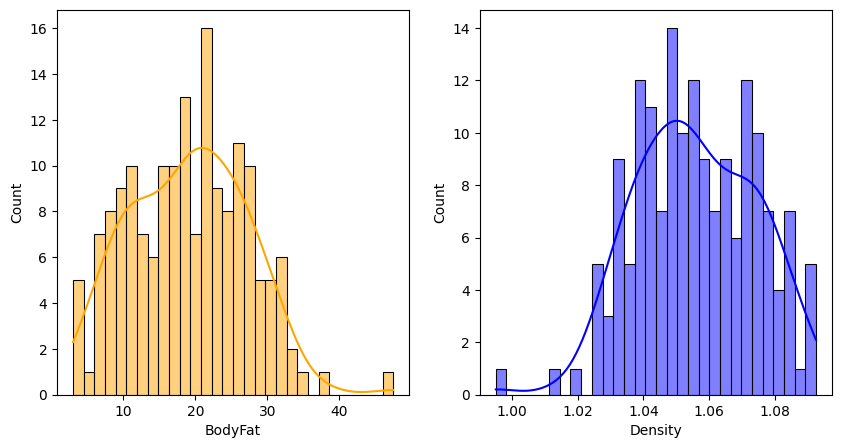

In [21]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
plt.subplot(121)
sns.histplot(data = df, x = 'BodyFat', bins =30, kde = True, color='orange')
plt.subplot(122)
sns.histplot(data = df, x = 'Density', bins = 30, kde = True, color = 'blue')

<Axes: xlabel='BodyFat', ylabel='Density'>

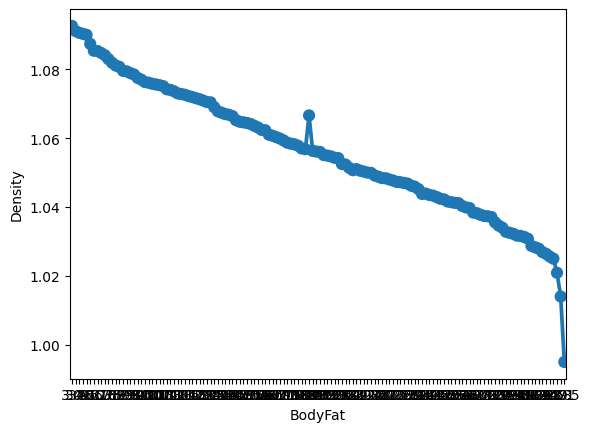

In [22]:
sns.pointplot(data=df, x='BodyFat',y='Density')

The distribution of BodyFat and Density are symetric because the Bodyfat is calculated based on the body density using "Siri's equation". 

Percentage of Body Fat (i.e. 100*B) = 495/D - 450.



### 4.2 Explore the Correlation between each predictor with label (BodyFat)

#### Separate data into predictor features and label

In [23]:
x = df.drop(columns = ['Id','Density','BodyFat'], axis =1) #Predictor Features
y = df['BodyFat'] #Label

In [24]:
x.shape

(168, 13)

#### There are 13 potiential predictors

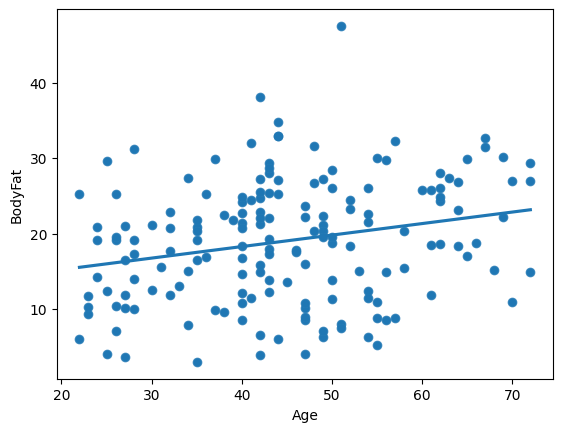

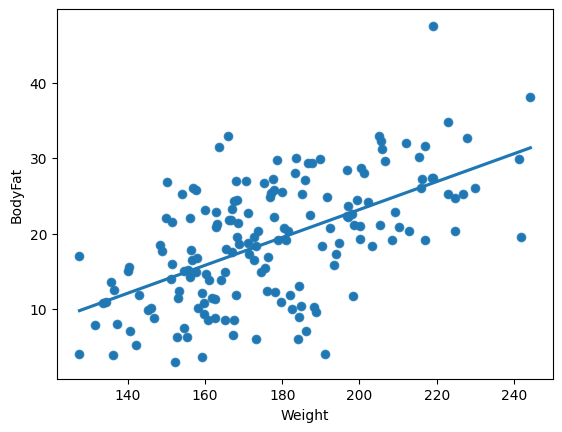

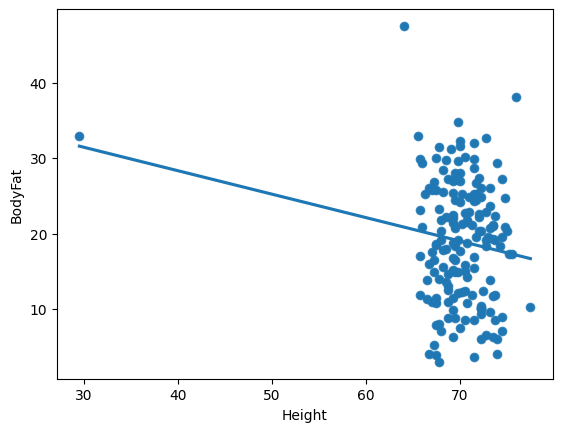

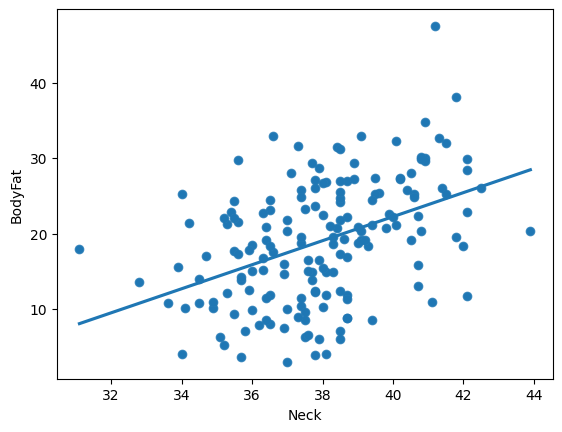

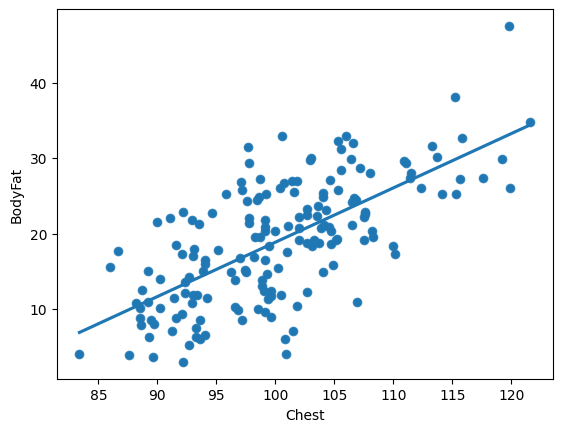

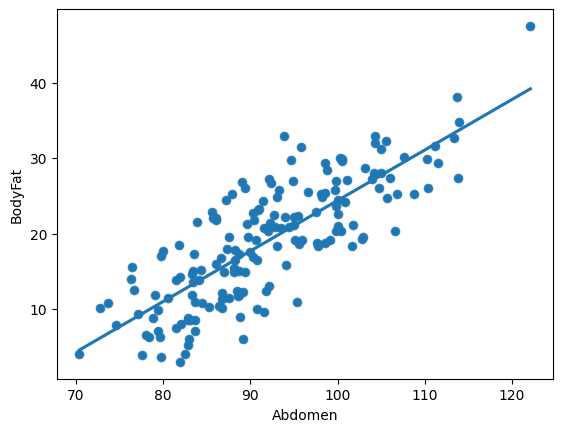

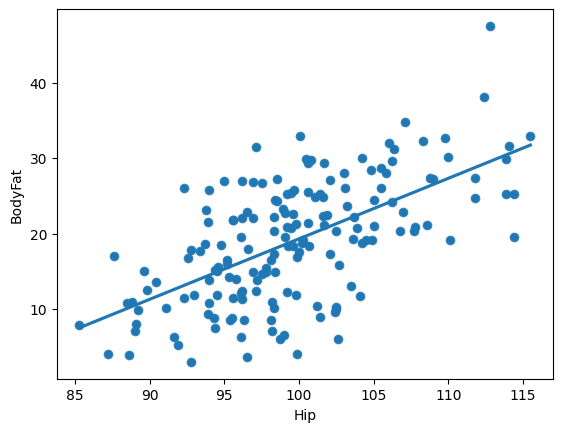

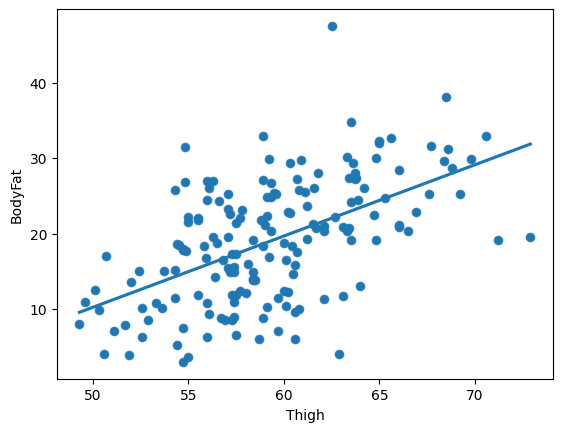

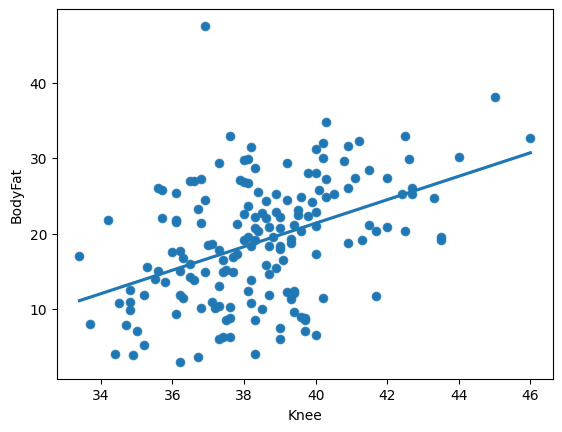

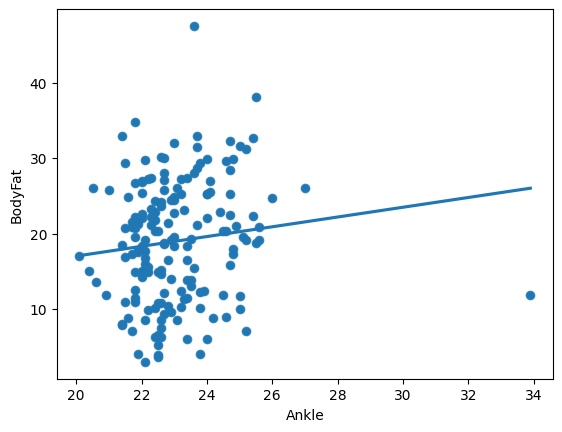

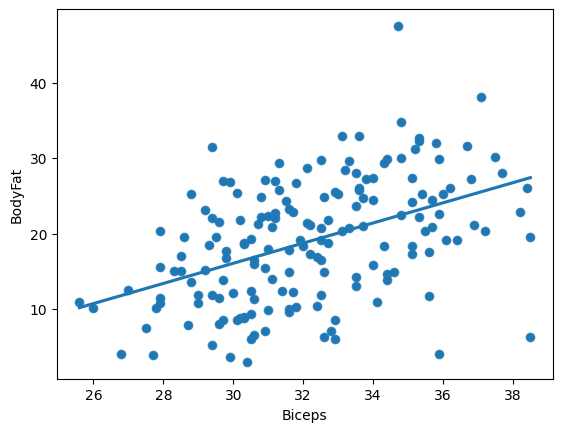

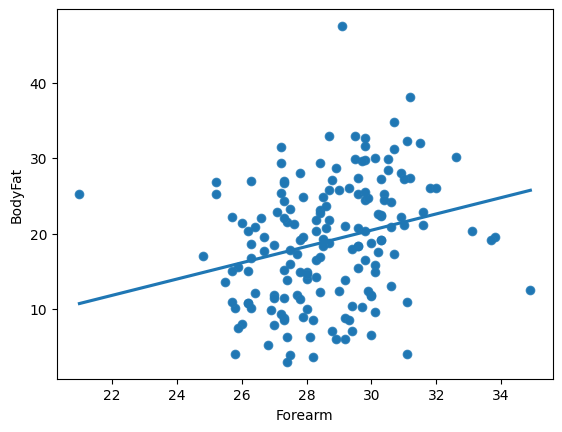

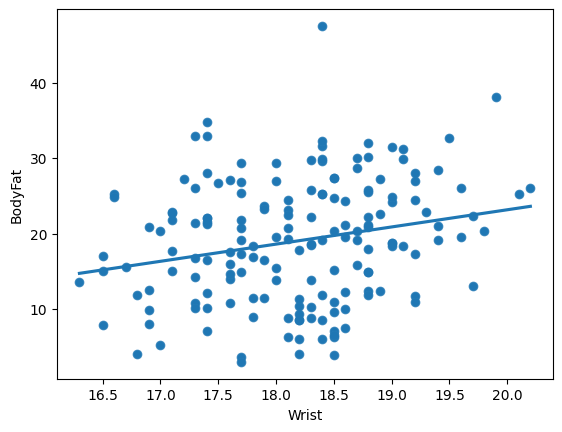

In [25]:
for i in x.columns:
    sns.scatterplot(data = df, x = i, y ='BodyFat')
    sns.regplot(data =df, x = i, y = 'BodyFat',ci =None)
    plt.show()

#### The features that most correlated with BodyFat includes Weight, Neck Circumference(cir), Chest cir, Abdomen cir, Hip cir, Thigh cir, Knee cir, and Biceps cir. 

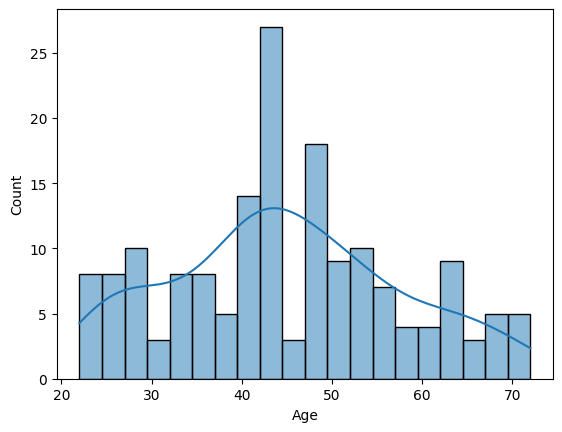

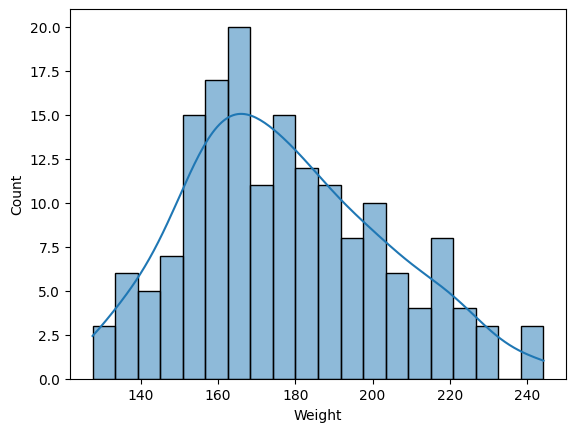

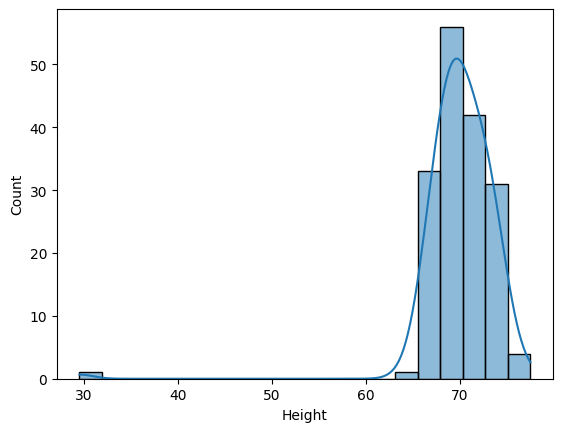

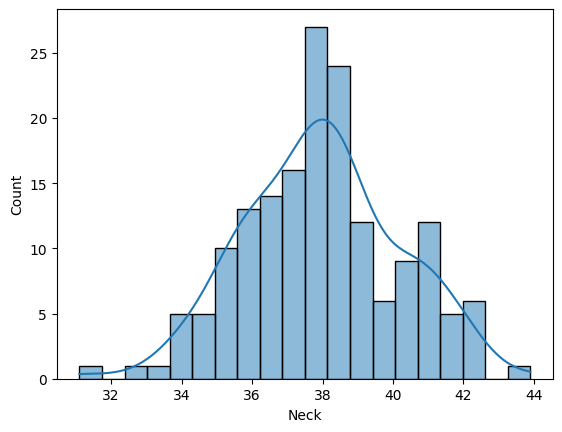

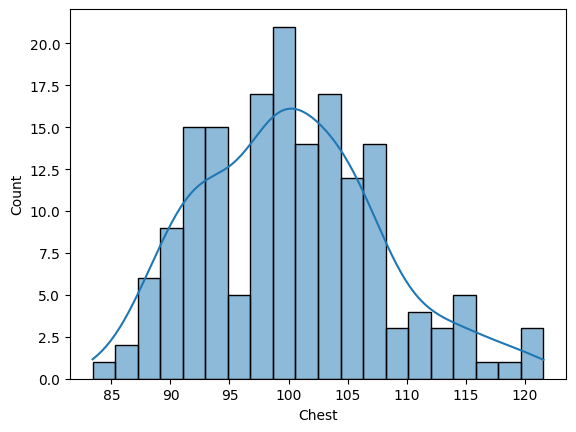

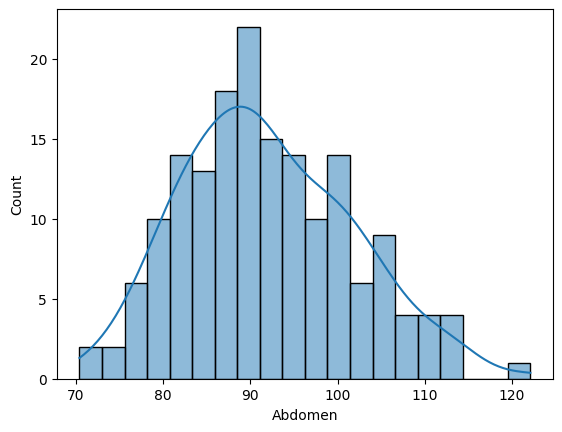

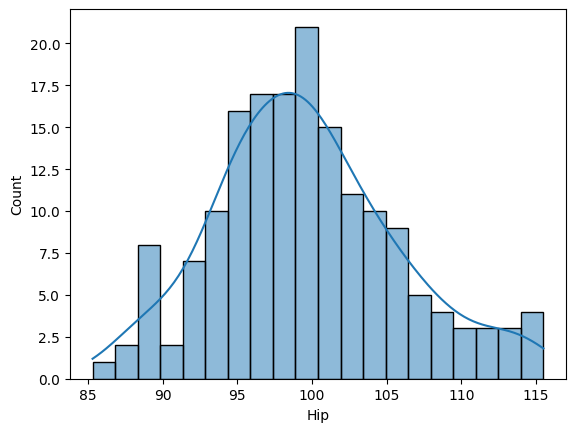

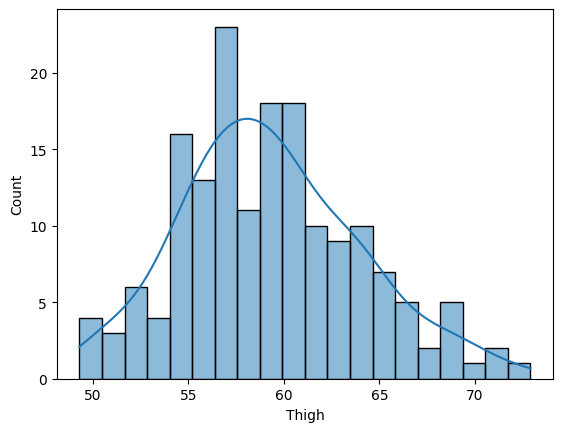

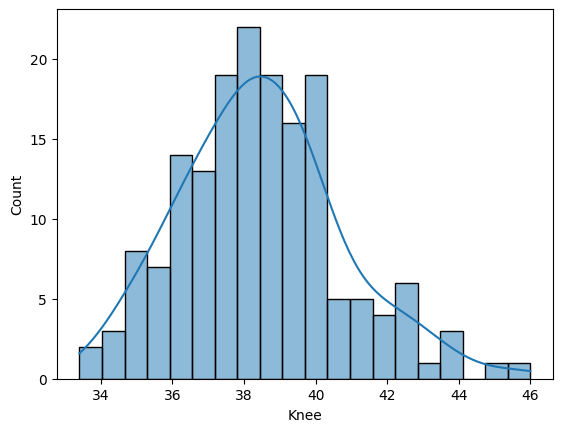

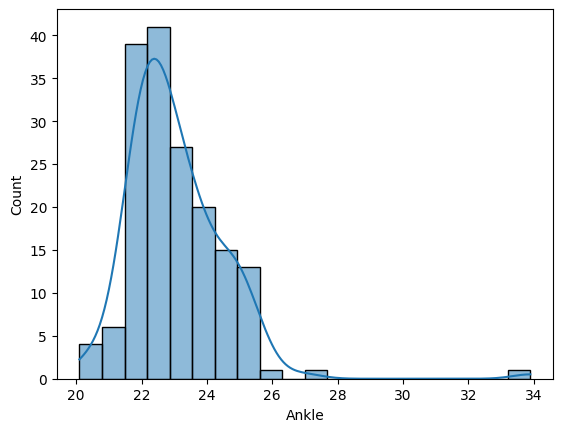

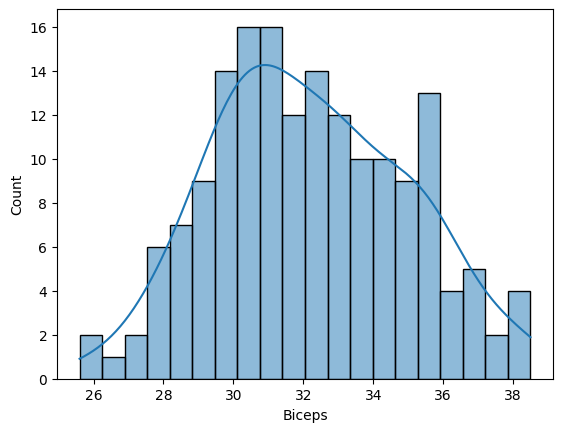

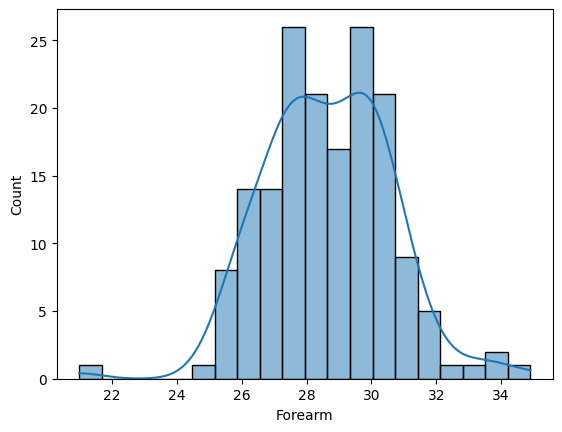

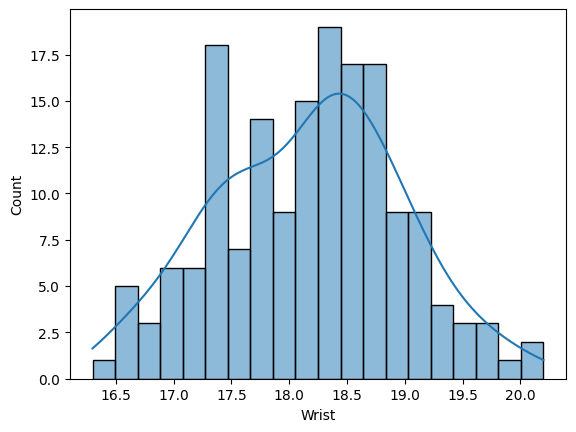

In [26]:
for i in x.columns:
    sns.histplot(data = df, x = i,bins =20,kde=True)
    plt.show()